<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Selection/blob/main/Feature-Selection-(Step%20Forward%2C%20Step%20Backward%20and%20Exhaustive%20Feature%20Selection%20(Wrapper%20Method)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mlxtend

# **Step Forward Selection (SFS)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [ ]:
data=load_wine()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
data.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [ ]:
x=pd.DataFrame(data.data)
y=data.target

In [ ]:
x.columns=data.feature_names
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
x.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape

((142, 13), (36, 13))

# **Step Forward Feature Selection (SFS)**

In [ ]:
# This is wrt to taken 7 features out of 13
sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        k_features=7,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=4,
        n_jobs=-1).fit(x_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   11.3s finished

[2021-02-09 15:55:54] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.1s finished

[2021-02-09 15:56:03] Features: 2/7 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.9s finished

[2021-02-09 15:56:12] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.6s finished

[2021-02-09 15:56:20] Features: 4/7 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.3s finished

[202

In [ ]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'magnesium',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'proline')

In [ ]:
sfs.k_feature_idx_

(0, 2, 4, 6, 8, 9, 12)

In [ ]:
sfs.k_score_

0.9791666666666666

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.76746,"(flavanoids,)",0.0670901,0.0418533,0.024164
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.971825,"(flavanoids, color_intensity)",0.031492,0.0196459,0.0113425
3,"(4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(magnesium, flavanoids, color_intensity)",0.0225862,0.0140901,0.00813492
4,"(4, 6, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(magnesium, flavanoids, color_intensity, proline)",0.0194714,0.012147,0.00701308
5,"(2, 4, 6, 9, 12)","[0.9444444444444444, 0.9722222222222222, 0.971...",0.972024,"(ash, magnesium, flavanoids, color_intensity, ...",0.0314903,0.0196449,0.011342
6,"(2, 4, 6, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(ash, magnesium, flavanoids, proanthocyanins, ...",0.0194714,0.012147,0.00701308
7,"(0, 2, 4, 6, 8, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(alcohol, ash, magnesium, flavanoids, proantho...",0.0369201,0.0230321,0.0132976


# **Step Backward Selection (SBS)**

In [ ]:
# This is wrt to taken range of features out of 13 features
sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        k_features=(1,8),
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=4,
        n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.3s finished

[2021-02-09 15:56:49] Features: 1/8 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.0s finished

[2021-02-09 15:56:58] Features: 2/8 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.8s finished

[2021-02-09 15:57:07] Features: 3/8 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2021-02-09 15:57:15] Features: 4/8 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.3s finished

[202

In [ ]:
sbs=sfs

In [ ]:
sbs.k_score_

0.9859126984126985

In [ ]:
sbs.k_feature_names_

('magnesium', 'flavanoids', 'color_intensity')

# **Exhaustive Feature Selection(EFS)**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
efs=EFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        min_features=4,
        max_features=5,
        scoring='accuracy',
        cv=None,
        n_jobs=-1
        ).fit(x_train,y_train)

Features: 2002/2002

In [ ]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'mean_squared_error',
 |      'median_absolute_error', 'r2'} for regressors,
 |      or a callable object or function with
 |      signature ``scorer(estimator, X, y)``.
 |  cv : int (

In [ ]:
efs.best_score_

1.0

In [ ]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [ ]:
efs.best_idx_

(0, 1, 2, 3)

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


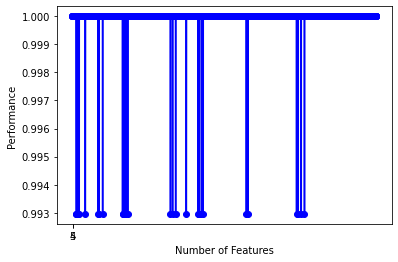

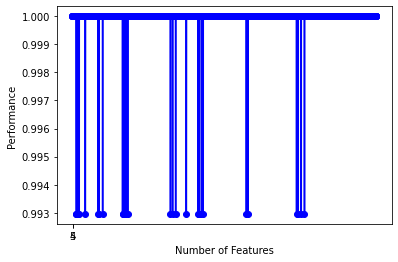

In [ ]:
plot_sfs(efs.get_metric_dict(),kind='std_dev')